# Ajay Yadav 

In [8]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Importing the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Applying Elbow Method

In [10]:
#finding optimum number of clusters for k-means classifier

x=iris_df.iloc[:,:].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [11]:
frame=pd.DataFrame({'cluster':range(1,11), 'wcss':wcss})

Text(0, 0.5, 'Inertia')

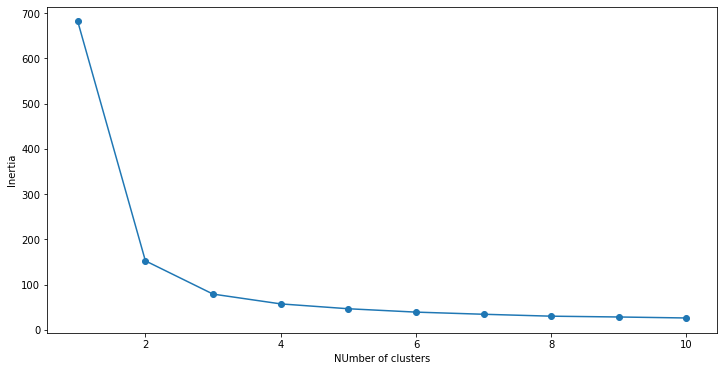

In [12]:
#plotting the obtained result onto a line graph

plt.figure(figsize=(12,6))
plt.plot(frame['cluster'],  frame['wcss'],  marker='o')
plt.xlabel('NUmber of clusters')
plt.ylabel('Inertia')

from above graph we get that the optimum cluster is where when elbow occurs.
i.e when wcss remained approximately same.

In [13]:
#Applying KMeans algorithm to dataset to obtained classifier result

kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

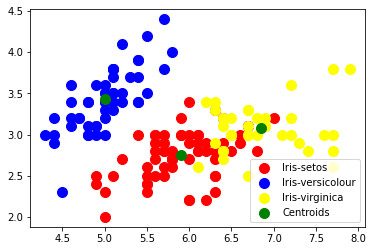

In [14]:
#Visualising the clusters by selecting two features

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Iris-setos' )
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=100, c='yellow', label='Iris-virginica') 

#plotting the centroid of clusters

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='green' ,label='Centroids')
plt.legend()